In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import math
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

import matplotlib.pyplot as plt

import cv2

In [16]:
#LOAD IMAGE DATASET
terinfeksi_data = os.listdir('/content/drive/My Drive/dataset/Datasetainun/DATA5050/Pneumonia/')
print(terinfeksi_data[:3])
print(len(terinfeksi_data))

print('\n')
tidakTerinfeksi_data = os.listdir('/content/drive/My Drive/dataset/Datasetainun/DATA5050/Tidak Pneumonia/')
print(tidakTerinfeksi_data[:3])
print(len(tidakTerinfeksi_data))

['person63_bacteria_306.jpeg', 'person26_bacteria_122.jpeg', 'person69_bacteria_338.jpeg']
500


['IM-0656-0001.jpeg', 'IM-0655-0001.jpeg', 'IM-0652-0001.jpeg']
500


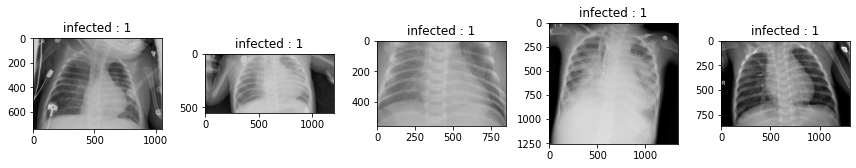

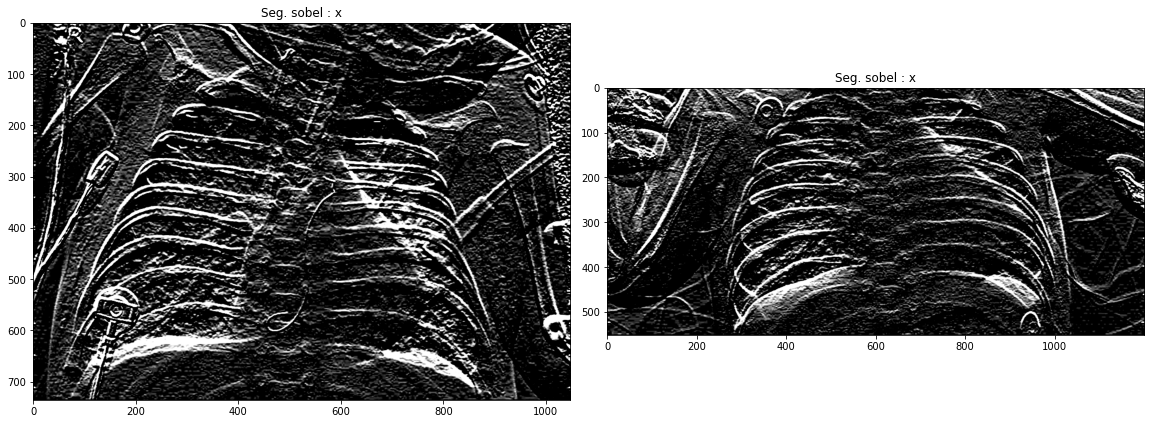

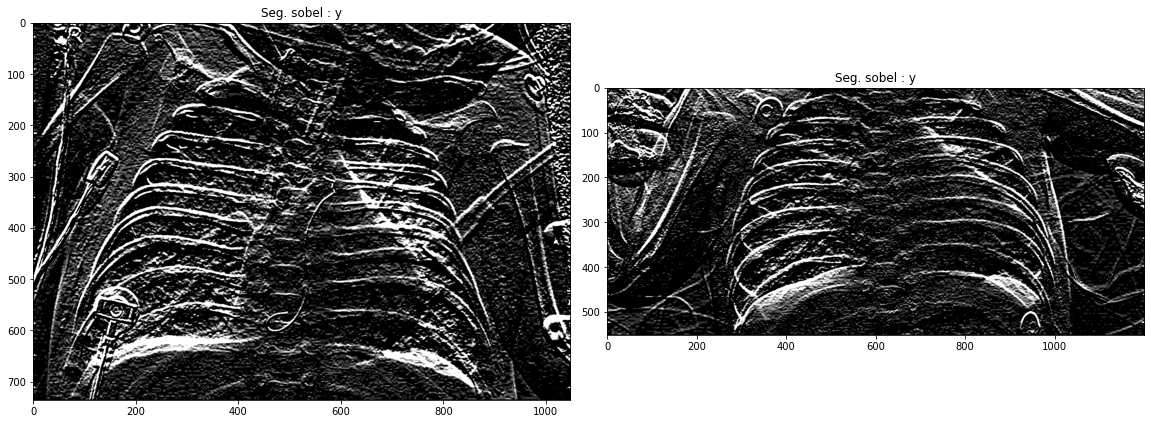

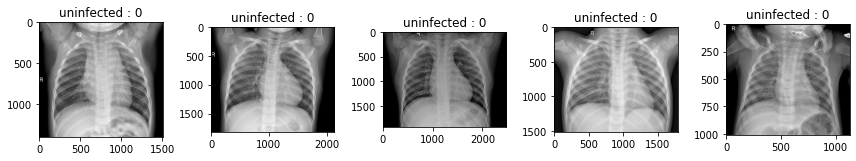

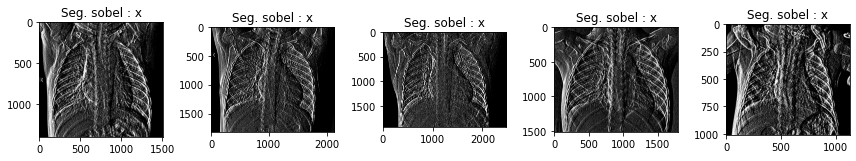

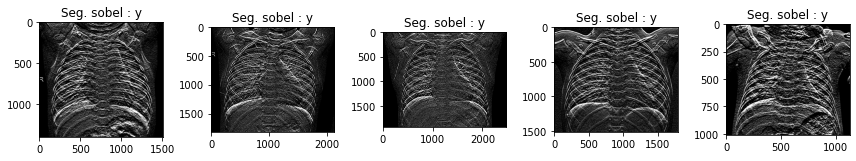

In [63]:
#VISUALISASI
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/Datasetainun/DATA5050/Pneumonia' + "/" + terinfeksi_data[i])
    plt.imshow(img)
    plt.title('infected : 1')
    plt.tight_layout()

plt.figure(figsize = (40,40))
for i in range(2):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/Datasetainun/DATA5050/Pneumonia' + "/" + terinfeksi_data[i])
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. sobel : x')
    plt.tight_layout()

plt.figure(figsize = (40,40))
for i in range(2):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/Datasetainun/DATA5050/Pneumonia' + "/" + terinfeksi_data[i])
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img,(1,3),0)
    edges = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. sobel : y')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/Datasetainun/DATA5050/Tidak Pneumonia' + "/" + tidakTerinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/Datasetainun/DATA5050/Tidak Pneumonia' + "/" + tidakTerinfeksi_data[i])
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. sobel : x')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/Datasetainun/DATA5050/Tidak Pneumonia' + "/" + tidakTerinfeksi_data[i])
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. sobel : y')
    plt.tight_layout()

plt.show()

In [0]:
#SEGMENTASI DAN HUMOMENT
x = np.array([['h1','h2','h3','h4','h5','h6','h7','target']])
for i in range(5):
    img = cv2.imread('/content/drive/My Drive/dataset/Datasetainun/DATA5050/Pneumonia' + "/" + terinfeksi_data[i])
    edges = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

for i in range(5):
    img = cv2.imread('/content/drive/My Drive/dataset/Datasetainun/DATA5050/Tidak Pneumonia' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Sobel(img,cv2.CV_8U,1,0)
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))


In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/dataset/malariax.csv", x, fmt='%s',delimiter=',' )

In [66]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/dataset/malariax.csv')
print (len(dataset))
print (dataset)

10
         h1            h2            h3  ...            h6            h7  target
0  0.003228  2.162545e-06  1.301684e-09  ...  1.251875e-12 -1.804455e-20     1.0
1  0.004466  8.961931e-06  1.234836e-08  ...  3.198644e-11 -6.295602e-18     1.0
2  0.003184  1.890685e-06  2.820745e-10  ...  2.012647e-13 -2.060149e-20     1.0
3  0.003153  1.922017e-07  2.492227e-09  ... -3.837261e-13 -5.592650e-19     1.0
4  0.002676  1.048621e-06  9.450630e-10  ...  2.707833e-13 -1.344242e-20     1.0
5  0.022813  8.120259e-07  7.771195e-08  ... -1.354695e-11  6.219855e-16     0.0
6  0.025745  2.409404e-06  2.012945e-07  ...  4.938395e-11  3.101786e-15     0.0
7  0.024407  1.666061e-06  2.942772e-07  ... -2.279913e-11  1.929730e-15     0.0
8  0.026733  2.569089e-05  1.334839e-07  ...  2.034592e-10  1.285309e-15     0.0
9  0.022162  8.966570e-07  6.907721e-08  ...  4.604968e-12 -5.299695e-16     0.0

[10 rows x 8 columns]


In [0]:
#replace NaN
zero_not_accepted = [ 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7' ]

for colum in zero_not_accepted:
   # dataset [colum] = dataset[colum].replace(0, np.NaN)
    mean = int(dataset[colum].mean(skipna=True))
    dataset[colum] = dataset[colum].replace(np.NaN, mean)

In [0]:
#split target and attribute
x = dataset.iloc[:,1:7]
y = dataset.iloc[:,7]

#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.1)
print(len(y_test))
print(len(x_train))
print(len(dataset))
y

100
900
1000


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: target, Length: 1000, dtype: float64

Text(0.5, 1.0, 'testing')

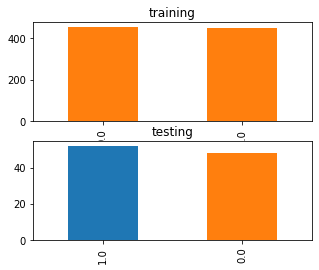

In [0]:
x_train
x_test
y_train
len(y_test)

plt.figure(figsize=(5,4))
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C1','C1','C2','C3','C4','C5','C6']);plt.title('training')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('testing')

In [0]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
x_train

array([[-0.03351301, -0.0333631 , -0.0333631 , -0.03335187,  0.03335265,
        -0.03335186],
       [-0.03351301, -0.0333631 , -0.0333631 , -0.03335187,  0.03335265,
        -0.03335186],
       [-0.03351301, -0.0333631 , -0.0333631 , -0.03335187,  0.03335265,
        -0.03335186],
       ...,
       [-0.03351301, -0.0333631 , -0.0333631 , -0.03335187,  0.03335265,
        -0.03335186],
       [-0.03351301, -0.0333631 , -0.0333631 , -0.03335187,  0.03335265,
        -0.03335186],
       [-0.03351301, -0.0333631 , -0.0333631 , -0.03335187,  0.03335265,
        -0.03335186]])

In [0]:
math.sqrt(len(y_test))

10.0

In [0]:
#choose method and fitting
classifier = KNeighborsClassifier(n_neighbors=10,p=2,metric='euclidean')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
#testing fsts
y_pred = classifier.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred, average=None))
print("recall :" , recall_score(y_test, y_pred, average=None))
print("F-Measure :" , f1_score(y_test, y_pred, average=None))

[[47  1]
 [48  4]]
Akurasi : 0.51
presisi : [0.49473684 0.8       ]
recall : [0.97916667 0.07692308]
F-Measure : [0.65734266 0.14035088]


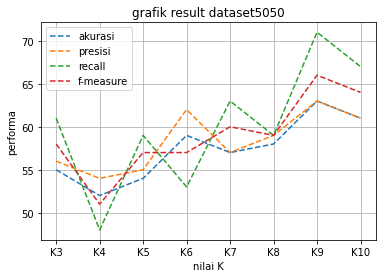

In [0]:
#dataset5050
from matplotlib import pyplot as plt
x = ["K3", "K4", "K5", "K6", "K7", "K8","K9","K10"]
a = [55, 52, 54, 59, 57, 58 , 63 ,61]
p = [56, 54, 55, 62, 57, 59, 63, 61]
r = [61, 48, 59, 53, 63, 59, 71, 67]
f = [58, 51, 57, 57, 60, 59, 66, 64]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result dataset5050")
plt.xlabel("nilai K")
plt.ylabel("performa")
plt.legend(["akurasi", "presisi", "recall", "f-measure"])
plt.grid()
plt.show()